## Preprocessing

In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the pollution_dataset.csv
import pandas as pd
pollution_df = pd.read_csv("resources/updated_pollution_dataset.csv")
pollution_df.shape

(5000, 10)

In [38]:
# Determine the number of unique values in each column.
pollution_df.nunique()

Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64

In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
# pollution_df = pd.get_dummies(pollution_df)
# pollution_df.head()

In [5]:
# Split our preprocessed data into our features and target arrays
X = pollution_df.drop(columns='Air Quality').values
y = pd.get_dummies(pollution_df['Air Quality']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
X_test.shape

(1250, 9)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [8]:
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=17, activation="relu", input_dim=9))

nn_model.add(tf.keras.layers.Dense(units=17, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

nn_model.summary()

C:\Users\hebir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 17)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 548 (2.14 KB)

 Trainable params: 548 (2.14 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2726 - loss: 0.6129
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6331 - loss: 0.3611
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8226 - loss: 0.2549
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8842 - loss: 0.1805
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9041 - loss: 0.1435
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9119 - loss: 0.1289
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9131 - loss: 0.1173
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.1028
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.0965
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9322 - loss: 0.0956
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9198 - loss: 0.0982
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

In [10]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 9ms/step - accuracy: 0.9504 - loss: 0.0765
Loss: 0.07649917900562286, Accuracy: 0.9503999948501587


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
# Convert predictions to discrete class labels using argmax
predictions = nn_model.predict(X_test_scaled) # Use scaled data for predictions
predicted_labels = predictions.argmax(axis=1)  # Get the index of the highest probability

# Convert y_test to a single-column format if it is one-hot encoded
y_test_labels = y_test.argmax(axis=1)  # Get the original class labels

# Create and save the testing classification report
testing_report = classification_report(y_test_labels, predicted_labels)

# Print the testing classification report
print(testing_report)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       508
           1       0.94      0.82      0.88       121
           2       0.95      0.95      0.95       376
           3       0.86      0.91      0.88       245

    accuracy                           0.95      1250
   macro avg       0.94      0.92      0.93      1250
weighted avg       0.95      0.95      0.95      1250



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
testing_matrix = confusion_matrix(y_test_labels, predicted_labels)
print(testing_matrix)

[[508   0   0   0]
 [  0  99   0  22]
 [  4   0 359  13]
 [  0   6  17 222]]


In [14]:
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9520 - loss: 0.0547 - val_accuracy: 0.9493 - val_loss: 0.0616
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9602 - loss: 0.0534 - val_accuracy: 0.9493 - val_loss: 0.0623
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9560 - loss: 0.0591 - val_accuracy: 0.9480 - val_loss: 0.0621
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.0546 - val_accuracy: 0.9440 - val_loss: 0.0644
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9517 - loss: 0.0548 - val_accuracy: 0.9453 - val_loss: 0.0628
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9638 - loss: 0.0518 - val_accuracy: 0.9507 - val_loss: 0.0641
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9612 - loss: 0.0506 - val_accuracy: 0.9467 - val_loss: 0.0635
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.0530 - val_accuracy: 0.9440 - val_loss:

In [16]:
nn_model_loss, nn_model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {nn_model_loss}, Accuracy: {nn_model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.9416 - loss: 0.0768
Loss: 0.07678838819265366, Accuracy: 0.9416000247001648


In [18]:
import matplotlib.pyplot as plt

In [19]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

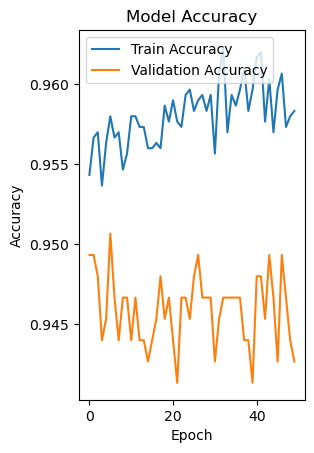

In [20]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

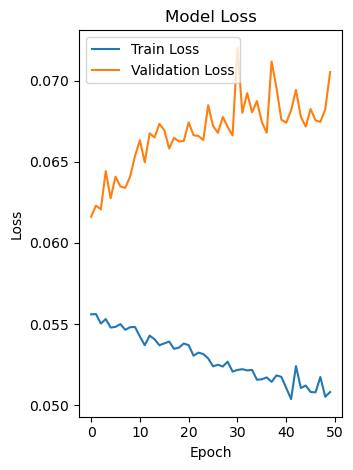

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
#Early stopping didn't help with the overfitting

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9630 - loss: 0.0506 - val_accuracy: 0.9493 - val_loss: 0.0682
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9580 - loss: 0.0518 - val_accuracy: 0.9413 - val_loss: 0.0690
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9628 - loss: 0.0454 - val_accuracy: 0.9400 - val_loss: 0.0709
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.0484 - val_accuracy: 0.9413 - val_loss: 0.0699
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9520 - loss: 0.0559 - val_accuracy: 0.9480 - val_loss: 0.0677
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9616 - loss: 0.0489 - val_accuracy: 0.9427 - val_loss: 0.0695
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.0460 - val_accuracy: 0.9440 - val_loss: 0.0694
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9664 - loss: 0.0451 - val_accuracy: 0.9427 - val_loss:

In [27]:
nn_model = tf.keras.models.Sequential()

# Reduce the number of units in the hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=9))

# Remove the second hidden layer
nn_model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

nn_model.summary()

C:\Users\hebir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4009 - loss: 0.6428
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4334 - loss: 0.4710
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5120 - loss: 0.3960
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 0.3363
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.2952
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 0.2592
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.2321
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.2116
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 0.1903
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.1821
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 0.1673
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

In [29]:
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9491 - loss: 0.0644 - val_accuracy: 0.9347 - val_loss: 0.0798
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9380 - loss: 0.0750 - val_accuracy: 0.9360 - val_loss: 0.0805
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.0712 - val_accuracy: 0.9360 - val_loss: 0.0810
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9462 - loss: 0.0686 - val_accuracy: 0.9373 - val_loss: 0.0802
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.0716 - val_accuracy: 0.9333 - val_loss: 0.0820
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9462 - loss: 0.0674 - val_accuracy: 0.9373 - val_loss: 0.0812
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.0714 - val_accuracy: 0.9360 - val_loss: 0.0808
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9428 - loss: 0.0728 - val_accuracy: 0.9373 - val_loss:

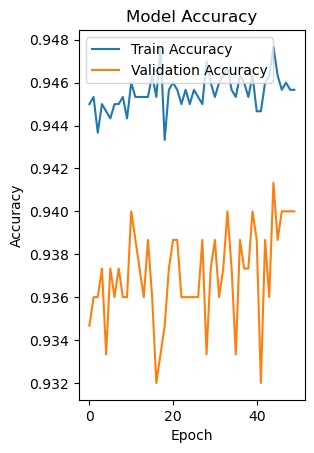

In [30]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

In [31]:
nn_model_loss, nn_model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {nn_model_loss}, Accuracy: {nn_model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.9424 - loss: 0.0771
Loss: 0.07714421302080154, Accuracy: 0.9423999786376953


In [ ]:
predictions

array([[1.36756242e-07, 1.09908838e-09, 9.99999344e-01, 5.10950827e-07],
       [9.99999940e-01, 3.82273442e-21, 8.23593277e-12, 8.22998916e-29],
       [6.00355143e-09, 9.80061054e-01, 2.25661330e-11, 1.99389998e-02],
       ...,
       [3.91897032e-07, 4.16335801e-08, 9.99896228e-01, 1.03213024e-04],
       [1.28387567e-08, 9.91064191e-01, 4.10619455e-11, 8.93586501e-03],
       [6.30222473e-07, 1.03461607e-05, 8.63283873e-01, 1.36705115e-01]],
      dtype=float32)

In [ ]:
y_test

,Good,Hazardous,Moderate,Poor
2764,False,False,True,False
4767,True,False,False,False
3814,False,True,False,False
3499,False,False,True,False
2735,False,False,False,True
...,...,...,...,...
3015,False,False,False,True
1891,False,False,False,True
2773,False,False,True,False
3803,False,True,False,False


## Save Results to HDF5 file

In [32]:
nn_model = tf.keras.models.Sequential()

# Reduce the number of units in the hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=9))

# Remove the second hidden layer
nn_model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

# Compile the model with a reduced learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
nn_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

nn_model.summary()

C:\Users\hebir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5164 - loss: 1.1240
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6675 - loss: 0.7806
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.6411
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.5418
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.4776
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.4245
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3586
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.3352
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8865 - loss: 0.3137
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8956 - loss: 0.2991
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2739
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

In [34]:
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9464 - loss: 0.1371 - val_accuracy: 0.9347 - val_loss: 0.1549
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.1489 - val_accuracy: 0.9347 - val_loss: 0.1566
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.1411 - val_accuracy: 0.9400 - val_loss: 0.1551
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9500 - loss: 0.1329 - val_accuracy: 0.9373 - val_loss: 0.1561
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9431 - loss: 0.1379 - val_accuracy: 0.9360 - val_loss: 0.1576
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9426 - loss: 0.1493 - val_accuracy: 0.9373 - val_loss: 0.1581
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9420 - loss: 0.1397 - val_accuracy: 0.9373 - val_loss: 0.1574
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.1383 - val_accuracy: 0.9360 - val_loss:

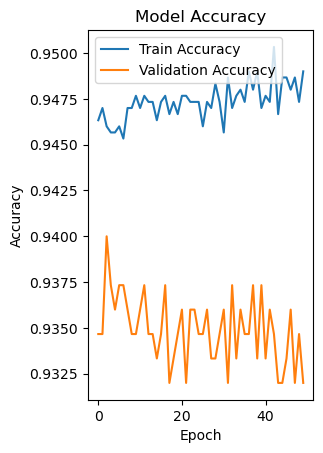

In [35]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

In [ ]:
# Export our model to HDF5 file
best_model.save('AirQuality_Assessment.keras')